<a href="https://colab.research.google.com/github/divyall/Data-Cleaning-and-Preprocessing-task1L1/blob/main/Task1_L2_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Assuming 'RM' (average number of rooms)
# And 'MEDV' is the median house value, which can be used as 'Price'
X = data[["RM"]]   # Independent variable (using 'RM' as for 'Sqft') for easy understanding
y = data["MEDV"]    # Dependent variable (using 'MEDV' as 'Price')

In [10]:
data = pd.read_csv("4) house Prediction Data Set.csv", header=None, sep='\s+')

# Assign meaningful column names (assuming a standard house price dataset structure)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = column_names

# Display first few rows
print(data.head())

# Check for missing values and datatypes
print(data.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3008479189.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("4) house Prediction Data Set.csv", header=None, sep='\s+')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Equation: Price = {intercept:.2f} + {coefficient:.2f} × Sqft")


Equation: Price = -36.25 + 9.35 × Sqft


In [15]:
y_pred = model.predict(X_test)


In [16]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 0.3707569232254778
Mean Squared Error: 46.144775347317264


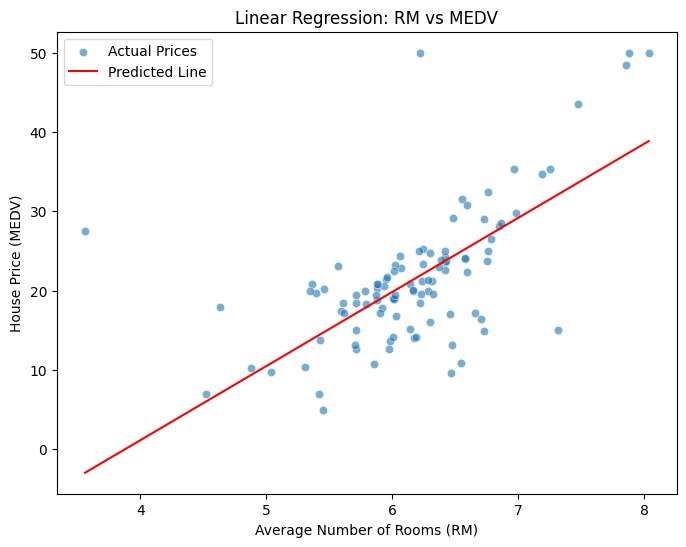

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["RM"], y=y_test, label="Actual Prices", alpha=0.6)
sns.lineplot(x=X_test["RM"], y=y_pred, color="red", label="Predicted Line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Linear Regression: RM vs MEDV")
plt.legend()
plt.show()